# measuring radial velocity after creation
Tim Tyree<br>
4.25.2024

In [1]:
import sys,os
og_stdout=sys.stdout
from lib.my_initialization import *
os.chdir(nb_dir)
from lib import *
# import cupy, cudf
# from lib.rapids_func import *
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
#reset matplotlib
plt.plot([1]*4)
plt.close()
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

# define module

# load creation ranges and average conditioned on time after creation

In [82]:
range_data_dir_fk = "/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_creation_range_timeseries.pkl"
#LR 200x200
# range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/tippos_per_001_creation_range_timeseries.pkl'
range_data_dir_lr='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_creation_range_timeseries.pkl'
# range_data_dir='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
os.path.exists(range_data_dir_fk)

True

In [125]:
data = load_from_pickle(range_data_dir_lr)
min_samples=100
mintmax=4.
# mintmax=100.
mintmax=200.  #looks sharper for lr
printing=True
tR_values_lst=[]
dict_lst=[]
nsteps=len(data)
for trial_num in range(nsteps):
    df = data[trial_num].rename(columns={'annihilation_index':'creation_index',
                            'tdeath':'tbirth'
                   })
    if df.shape[0]>0:
        groups = df.groupby(by='creation_index')
        for creation_index,g in groups:
            r0 = g.iloc[0]['R']
            n_prev = int(g.iloc[0]['n']) - 2
            tR_values = g[['tbirth','R',]].values
            tmax = tR_values[:,0].max()
            if tmax >= mintmax:
                #record
                tR_values_lst.append(pd.DataFrame(tR_values).rename(columns={0:'t',1:'R'}))
                dict_lst.append(dict(
                    trial_num=trial_num,
                    creation_index=creation_index,
                    r0=r0,
                    n_prev=n_prev,
                ))
        if printing:
            printProgressBar(trial_num+1,nsteps)
if printing:
    printProgressBar(nsteps,nsteps)

df_r0_lr = pd.DataFrame(dict_lst)

# df_r0['r0'].mean(),df_r0.shape[0]
dict_lst=[]
for t,gR in pd.concat(tR_values_lst).groupby(by='t'):
    R_values = gR['R'].values
    if R_values.shape[0]>=min_samples:
        meanR,Delta_meanR,num_obs,p_normal=comp_mean_bootstrap_uncertainty(R_values,num_samples=1000)
        #record
        dict_lst.append(dict(t=t,meanR=meanR,Delta_meanR=Delta_meanR,p_normal=p_normal,num_obs=num_obs))
df_R_lr = pd.DataFrame(dict_lst)

In [126]:
data = load_from_pickle(range_data_dir_fk)
min_samples=100
mintmax=4.
# mintmax=100.
mintmax=200.  #looks sharper for lr
printing=True
tR_values_lst=[]
dict_lst=[]
nsteps=len(data)
for trial_num in range(nsteps):
    df = data[trial_num].rename(columns={'annihilation_index':'creation_index',
                            'tdeath':'tbirth'
                   })
    if df.shape[0]>0:
        groups = df.groupby(by='creation_index')
        for creation_index,g in groups:
            r0 = g.iloc[0]['R']
            n_prev = int(g.iloc[0]['n']) - 2
            tR_values = g[['tbirth','R',]].values
            tmax = tR_values[:,0].max()
            if tmax >= mintmax:
                #record
                tR_values_lst.append(pd.DataFrame(tR_values).rename(columns={0:'t',1:'R'}))
                dict_lst.append(dict(
                    trial_num=trial_num,
                    creation_index=creation_index,
                    r0=r0,
                    n_prev=n_prev,
                ))
        if printing:
            printProgressBar(trial_num+1,nsteps)
if printing:
    printProgressBar(nsteps,nsteps)

df_r0_fk = pd.DataFrame(dict_lst)

# df_r0['r0'].mean(),df_r0.shape[0]
dict_lst=[]
for t,gR in pd.concat(tR_values_lst).groupby(by='t'):
    R_values = gR['R'].values
    if R_values.shape[0]>=min_samples:
        meanR,Delta_meanR,num_obs,p_normal=comp_mean_bootstrap_uncertainty(R_values,num_samples=1000)
        #record
        dict_lst.append(dict(t=t,meanR=meanR,Delta_meanR=Delta_meanR,p_normal=p_normal,num_obs=num_obs))
df_R_fk = pd.DataFrame(dict_lst)

In [127]:
beep(3)

-n 
-n 
-n 


0

# visualize mean radial creation timeseries

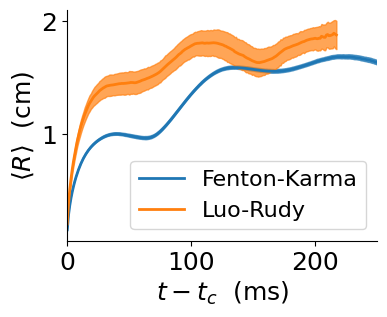

In [150]:
fig,ax=plt.subplots(figsize=(4,3))

df_R = df_R_fk
# df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
ax.plot(t_values,R_values,color='C0',label='Fenton-Karma',lw=2)
ax.fill_between(t_values,R_values-Delta_R_values,R_values+Delta_R_values,color='C0',alpha=0.7)

# df_R = df_R_fk
df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
ax.plot(t_values,R_values,color='C1',label='Luo-Rudy',lw=2)
ax.fill_between(t_values,R_values-Delta_R_values,R_values+Delta_R_values,color='C1',alpha=0.7)


# format_plot
format_plot(ax=ax,xlabel=r'$t-t_c$  (ms)',ylabel=r'$\langle R\rangle$  (cm)',fontsize=18)
spines = ax.spines[['right','top']].set_visible(False)
ax.legend(fontsize=16)
ax.set_xlim([0,250])
plt.show()

at first datum, dRdt = 0.1317 ± 0.0046 cm/ms (FK)
at first datum, dRdt = 0.1811 ± 0.0356 cm/ms (LR)


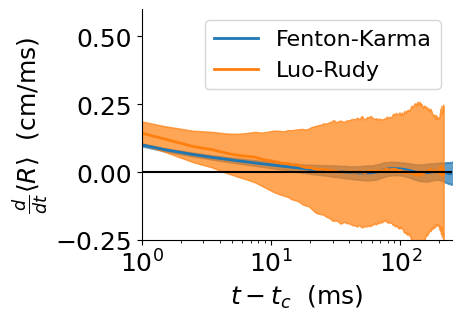

In [163]:
fig,ax=plt.subplots(figsize=(4,3))

df_R = df_R_fk
# df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
ax.plot(tt_values,dRdt_values,color='C0',label='Fenton-Karma',lw=2)
ax.fill_between(tt_values,dRdt_values-Delta_dRdt_values,dRdt_values+Delta_dRdt_values,color='C0',alpha=0.7)
print(f"at first datum, dRdt = {dRdt_values[0]:.4f} ± {Delta_dRdt_values[0]:.4f} cm/ms (FK)")

# df_R = df_R_fk
df_R = df_R_lr
t_values = df_R['t'].values
R_values = df_R['meanR'].values
Delta_R_values = df_R['Delta_meanR'].values
dRdt_values = np.diff(R_values) / np.diff(t_values)
tt_values = moving_average(t_values,2)
Delta_dRdt_values = moving_average(Delta_R_values,2)*2
# Delta_dRdt_values = moving_average(Delta_R_values,2)
ax.plot(tt_values,dRdt_values,color='C1',label='Luo-Rudy',lw=2)
ax.fill_between(tt_values,dRdt_values-Delta_dRdt_values,dRdt_values+Delta_dRdt_values,color='C1',alpha=0.7)
print(f"at first datum, dRdt = {dRdt_values[0]:.4f} ± {Delta_dRdt_values[0]:.4f} cm/ms (LR)")

# format_plot
# xlim = [0,250]
xlim = [1,250]
ax.plot(xlim,[0,0],'k-')
format_plot(ax=ax,xlabel=r'$t-t_c$  (ms)',ylabel=r'$\frac{d}{dt}\langle R\rangle$  (cm/ms)',fontsize=18)
spines = ax.spines[['right','top']].set_visible(False)
ax.legend(fontsize=16)
ax.set_xlim(xlim)
ax.set_ylim([-0.25,0.6])
ax.set_xscale('log')
plt.show()